In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,0.000004,0.179640,0.126075,0.137125,0.137126,0.137316,0.141342,0.176480,0.233690,...,0.044358,0.000826,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.823221
1,2,0.000005,0.137428,0.096608,0.137125,0.139092,0.180553,0.207000,0.230610,0.272338,...,0.003526,0.000078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.890568
2,3,0.000009,0.123832,0.088554,0.137125,0.144901,0.196373,0.219031,0.246661,0.310786,...,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.896303
3,4,0.000014,0.115605,0.080465,0.137126,0.177413,0.217933,0.241328,0.288255,0.195886,...,0.000014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.896741
4,5,0.000022,0.110190,0.094898,0.137125,0.137159,0.141203,0.230710,0.253875,0.299813,...,0.003286,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.886670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,0.000024,0.046628,0.075401,0.363216,0.416440,0.463381,0.504432,0.543029,0.577144,...,0.573875,0.538276,0.456459,0.336005,0.212000,0.110152,0.031915,0.000648,0.0,0.917666
106,107,0.000023,0.043299,0.066172,0.324178,0.367051,0.406603,0.447887,0.495652,0.540491,...,0.583870,0.560605,0.477420,0.338182,0.196137,0.073254,0.011029,0.000000,0.0,0.913792
107,108,0.000022,0.047087,0.076196,0.381900,0.436815,0.482285,0.527926,0.567574,0.595469,...,0.585307,0.543003,0.462082,0.349083,0.235633,0.122182,0.039921,0.000482,0.0,0.920184
108,109,0.000021,0.045856,0.067910,0.308742,0.349464,0.387349,0.426411,0.466539,0.509709,...,0.577903,0.583130,0.559826,0.481464,0.332135,0.183351,0.063578,0.008074,0.0,0.907771


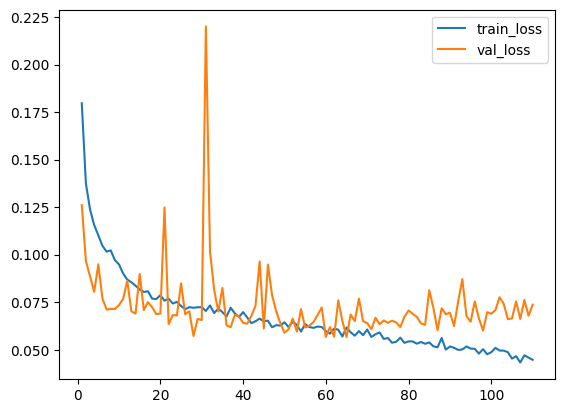

In [14]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.3, 0.6)

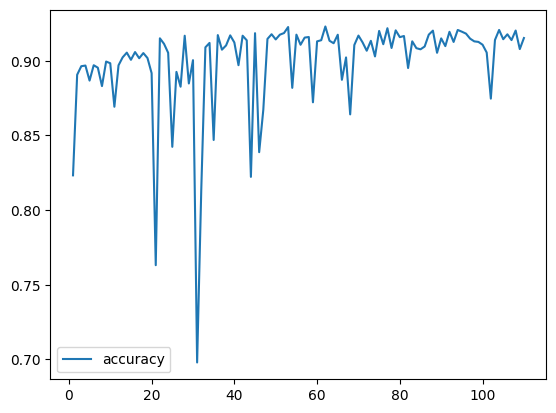

In [15]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

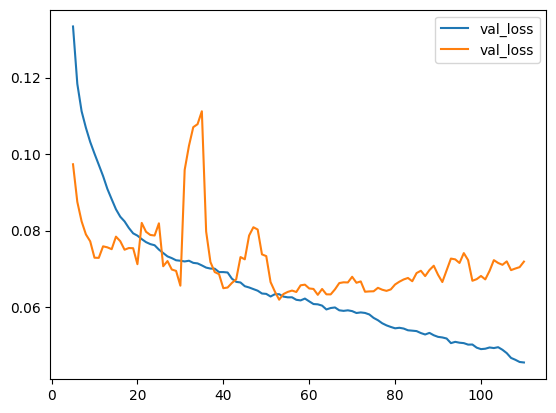

In [16]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(110, 16)
0.6369365453720093


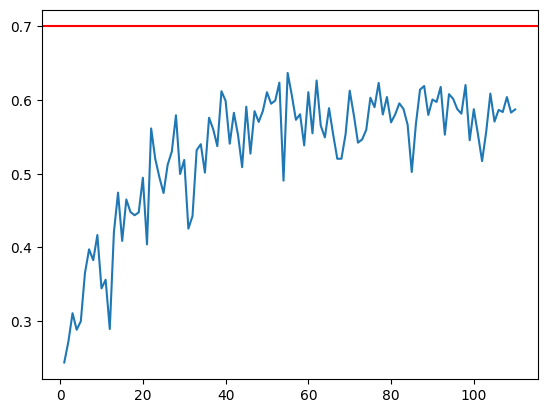

In [17]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

print(np.max(df_fbeta))

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


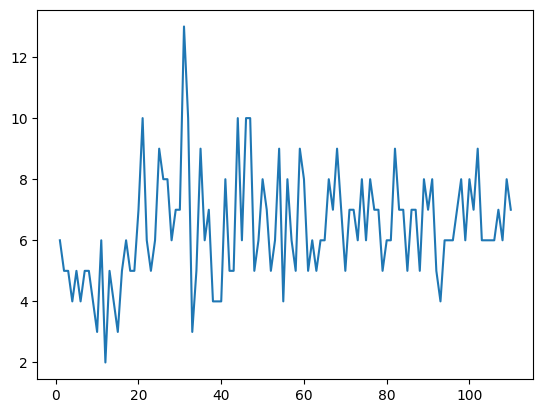

In [18]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")